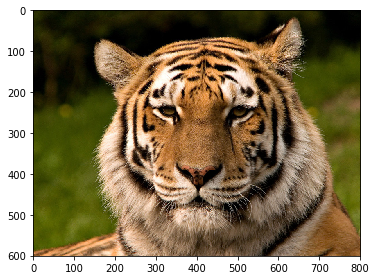

In [2]:
from skimage.io import imread, imshow, imsave
img = imread('tiger-color.png')
imshow(img)

In [3]:
from skimage import img_as_float,img_as_ubyte

In [4]:
img_f = img_as_float(img)

In [5]:
r = img_f[:,:,0]
g = img_f[:,:,1]
b = img_f[:,:,2]

In [6]:
y = 0.2126 * r + 0.7152 * g + 0.0722 * b

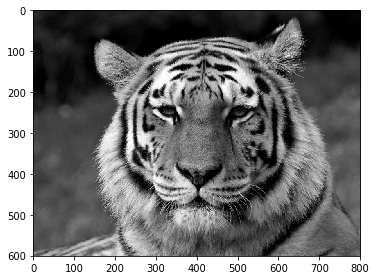

In [7]:
imshow(y)

In [9]:
def cyclic_shift(img, b_cropped, g_cropped, row_g, col_g, isRed):
    x = 0
    idx_i = 0
    idx_j = 0

In [ ]:
    for i in range(-15, 15):
        img_row = numpy.roll(b_cropped, i, axis=0)
        for j in range(-15, 15):
            img_col = numpy.roll(img_row, j, axis=1)
            correlation = (img_col * g_cropped).sum()
            if x < correlation:
                x = correlation
                idx_i = i
                idx_j = j

In [ ]:
    if isRed == True:
        row = abs(row_g - idx_i + int(img.shape[0] / 3))
    else:
        row = abs(row_g - idx_i - int(img.shape[0] / 3))

In [ ]:
    col = col_g - idx_j
    return (row, col)

In [ ]:
def value(img_shape, position):
    if position == 'start':
        return int((img_shape * 5) / 100)
    else:
        return int((img_shape * 95) / 100)

In [ ]:
def align(img, g_coord):
    row_g, col_g = g_coord
    
    b_row_coords = int(img.shape[0] / 3)
    g_row_coords = int(img.shape[0] / 3) + b_row_coords
    r_row_coords = b_row_coords + g_row_coords

    b = img[0:b_row_coords, 0:img.shape[1]]
    g = img[b_row_coords:g_row_coords, 0:img.shape[1]]
    r = img[g_row_coords:r_row_coords, 0:img.shape[1]]

    b_cropped = b[value(b.shape[0], 'start'):value(b.shape[0], 'end'), value(img.shape[1], 'start'):value(img.shape[1], 'end')]
    g_cropped = g[value(g.shape[0], 'start'):value(g.shape[0], 'end'), value(img.shape[1], 'start'):value(img.shape[1], 'end')]
    r_cropped = r[value(r.shape[0], 'start'):value(r.shape[0], 'end'), value(img.shape[1], 'start'):value(img.shape[1], 'end')]
    
    row_b, col_b = cyclic_shift(img, b_cropped, g_cropped, row_g, col_g, False)
    row_r, col_r = cyclic_shift(img, r_cropped, g_cropped, row_g, col_g, True)
    
    return (row_b, col_b), (row_r, col_r)